<a href="https://colab.research.google.com/github/AditMeh/deep-learning/blob/main/meta-learning/siamese_net/train_siamese_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AditMeh/deep-learning

Cloning into 'deep-learning'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (469/469), done.
remote: Compressing objects: 100% (320/320), done.
remote: Total 469 (delta 236), reused 199 (delta 84), pack-reused 0
Receiving objects: 100% (469/469), 24.52 MiB | 23.80 MiB/s, done.
Resolving deltas: 100% (236/236), done.


In [2]:
%%capture
%cd ./deep-learning/meta-learning/siamese_net/
!git clone https://github.com/brendenlake/omniglot
%cd omniglot/python
!unzip images_background.zip
!unzip images_evaluation.zip
%cd ../..

In [3]:
from random import sample
from dataloader import RandomPairSampler, Ommniglot_Dataset
from torch.utils.data import DataLoader
from utils import dataset_to_dicts
from model import SiameseNet
from train import train_fixed_dataset, train_random_samples
import torch

TRAIN_DATASET_PATH = "omniglot/python/images_background/"
VALIDATION_DATASET_PATH = "omniglot/python/images_evaluation/"

ds_train_structured, ds_train_unstructured = dataset_to_dicts(
    TRAIN_DATASET_PATH)
ds_val_structured, ds_val_unstructured = dataset_to_dicts(
    VALIDATION_DATASET_PATH)

In [4]:
from torchvision import transforms

transforms_seq = transforms.Compose([transforms.RandomRotation((-20, 20)),
                                     transforms.GaussianBlur(3, (0.1, 5))])

In [5]:
train_dataset_random = RandomPairSampler(
    dataset_dict=ds_train_unstructured, sample_mode="uniform", is_val=False, transform=transforms_seq)

val_dataset_random = RandomPairSampler(
    dataset_dict=ds_val_unstructured, sample_mode="uniform", is_val=True, transform=transforms_seq)

train_loader_random = DataLoader(
    train_dataset_random, batch_size=32, num_workers=2)

val_loader_random = DataLoader(
    val_dataset_random, batch_size=32, num_workers=2)

In [6]:
train_dataset_fixed = Ommniglot_Dataset(30000,
    dataset_dict=ds_train_structured, sample_mode="within alphabet", is_val=False, transform=transforms_seq)

val_dataset_fixed = Ommniglot_Dataset(10000,
    dataset_dict=ds_val_structured, sample_mode="within alphabet", is_val=True, transform=transforms_seq)

train_loader_fixed = DataLoader(
    train_dataset_fixed, batch_size=32, num_workers=2)

val_loader_fixed = DataLoader(
    val_dataset_fixed, batch_size=32, num_workers=2)

In [7]:
from dataloader import create_task_dataloader

from utils import create_task_files

loader = create_task_dataloader(ds_train_structured, 10, sample_mode="within alphabet")

net = SiameseNet()

tensor([0.])


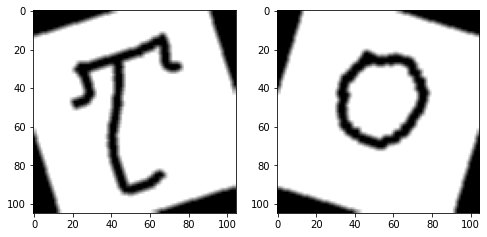

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

x1, x2, label = next(iter(val_loader_fixed))
idx = 0

images = [torch.squeeze(x1[idx]).cpu().detach().numpy(), torch.squeeze(x2[idx]).cpu().detach().numpy()]

print(label[idx])

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i - 1], cmap='gray')
plt.show()

In [9]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

print(f"Training on device {device}.")

net = SiameseNet().to(device=device)

val_loss_history_random, train_loss_history_random = train_random_samples(net, train_loader_fixed, val_loader_fixed, samples_per_epoch=30000, samples_val=10000, n_epochs=20,
        lr=0.00001, device=device, batch_size=32, save_path="blank")

Training on device cuda.


  0%|          | 0/937 [00:00<?, ?it/s]

torch.Size([32, 1, 105, 105])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 1, Train Loss 0.6182439468459106, Val Loss 0.5995054885936089, Val Accuracy 0.6857972756410257


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 2, Train Loss 0.525556340288836, Val Loss 0.5499736934136121, Val Accuracy 0.7210536858974359


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 3, Train Loss 0.46735661267725354, Val Loss 0.510060233087876, Val Accuracy 0.7542067307692307


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 4, Train Loss 0.40465731710481795, Val Loss 0.4753915675653097, Val Accuracy 0.780448717948718


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 5, Train Loss 0.3564412239362489, Val Loss 0.4585827814462857, Val Accuracy 0.7861578525641025


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 6, Train Loss 0.3161293277904598, Val Loss 0.439196022418447, Val Accuracy 0.8014823717948718


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 7, Train Loss 0.28209908402016987, Val Loss 0.43191472603342473, Val Accuracy 0.8022836538461539


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 8, Train Loss 0.25241066229190745, Val Loss 0.423353574023797, Val Accuracy 0.8066907051282052


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 9, Train Loss 0.22699970073735573, Val Loss 0.41949633876673686, Val Accuracy 0.8082932692307693


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 10, Train Loss 0.20132693082984762, Val Loss 0.41297370467621547, Val Accuracy 0.8168068910256411


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 11, Train Loss 0.1822421737373066, Val Loss 0.4132521607650396, Val Accuracy 0.8183092948717948


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 12, Train Loss 0.16254794434619432, Val Loss 0.41838082226996237, Val Accuracy 0.8153044871794872


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 13, Train Loss 0.14895349422920984, Val Loss 0.4065486715676693, Val Accuracy 0.8180088141025641


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 14, Train Loss 0.1343600410956138, Val Loss 0.4113899480838042, Val Accuracy 0.8198116987179487


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 15, Train Loss 0.11642803095098239, Val Loss 0.41359155801817393, Val Accuracy 0.8185096153846154


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 16, Train Loss 0.10040900212580392, Val Loss 0.4219720940081737, Val Accuracy 0.8146033653846154


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 17, Train Loss 0.0893205560906815, Val Loss 0.42471412115563184, Val Accuracy 0.8150040064102564


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 18, Train Loss 0.07963983063350492, Val Loss 0.42384868989197105, Val Accuracy 0.8197115384615384


  0%|          | 0/937 [00:00<?, ?it/s]

Epoch 19, Train Loss 0.06870646042830789, Val Loss 0.42893811114705527, Val Accuracy 0.8189102564102564
Epoch    19: reducing learning rate of group 0 to 1.0000e-06.


100%|█████████▉| 311/312 [00:23<00:00, 13.87it/s]

Epoch 20, Train Loss 0.06374935268473154, Val Loss 0.4138486990227531, Val Accuracy 0.827323717948718


In [10]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

print(f"Training on device {device}.")

net = SiameseNet().to(device=device)

val_loss_history_fixed, train_loss_history_fixed = train_fixed_dataset(net, train_loader=train_loader_fixed, val_loader=val_loader_fixed, n_epochs=20, lr=0.00001, device=device, batch_size=32, save_path="wew")

Training on device cuda.


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1, Train Loss 0.056952346357317586, Val Loss 0.018311842335774875, Val Accuracy 0.6895966453674122


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2, Train Loss 0.04815397607073331, Val Loss 0.017050380997074108, Val Accuracy 0.7184504792332268


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3, Train Loss 0.04244881048322486, Val Loss 0.015581239717075238, Val Accuracy 0.7617811501597445


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4, Train Loss 0.03736337052789121, Val Loss 0.014766519929404361, Val Accuracy 0.7804512779552716


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5, Train Loss 0.03310029650815188, Val Loss 0.014123358558446835, Val Accuracy 0.7932308306709265


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 6, Train Loss 0.02965986397349463, Val Loss 0.01399634556380657, Val Accuracy 0.7891373801916933


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 7, Train Loss 0.026434920040128852, Val Loss 0.01322652541916258, Val Accuracy 0.8054113418530351


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 8, Train Loss 0.023647729953090415, Val Loss 0.013095894505600102, Val Accuracy 0.8086062300319489


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 9, Train Loss 0.021131225305939683, Val Loss 0.012774395502020662, Val Accuracy 0.8155950479233227


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10, Train Loss 0.01898828019483235, Val Loss 0.012741615754751542, Val Accuracy 0.8157947284345048


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 11, Train Loss 0.016909620662877402, Val Loss 0.01272056515688618, Val Accuracy 0.8174920127795527


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 12, Train Loss 0.015133502376161682, Val Loss 0.01283498130554256, Val Accuracy 0.8173921725239617


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 13, Train Loss 0.013393350137091174, Val Loss 0.012655950270402736, Val Accuracy 0.8206869009584664


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 14, Train Loss 0.011778693845177206, Val Loss 0.012561295383101025, Val Accuracy 0.8237819488817891


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 15, Train Loss 0.010367745050071433, Val Loss 0.012441015382782339, Val Accuracy 0.8232827476038339


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 16, Train Loss 0.009245696559045523, Val Loss 0.012696524326222392, Val Accuracy 0.8243809904153354


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 17, Train Loss 0.007958629886402536, Val Loss 0.01244047292755149, Val Accuracy 0.8280750798722045


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 18, Train Loss 0.0071657724755134775, Val Loss 0.012809062378849989, Val Accuracy 0.8212859424920128


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 19, Train Loss 0.006267957755151731, Val Loss 0.01297386731883993, Val Accuracy 0.8234824281150159


100%|██████████| 313/313 [00:23<00:00, 13.24it/s]

Epoch 20, Train Loss 0.0055317650173460475, Val Loss 0.012867929583516555, Val Accuracy 0.8266773162939297


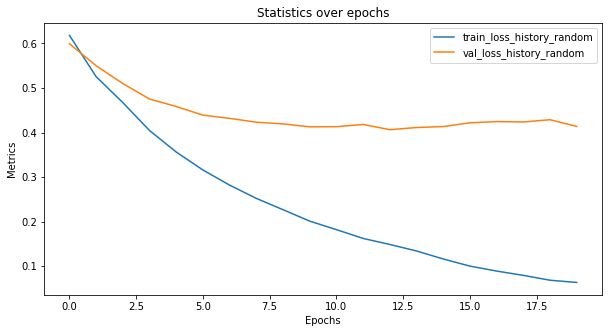

In [11]:
from utils import plot_train_graph
plot_train_graph(train_loss_history_random=train_loss_history_random, val_loss_history_random=val_loss_history_random)

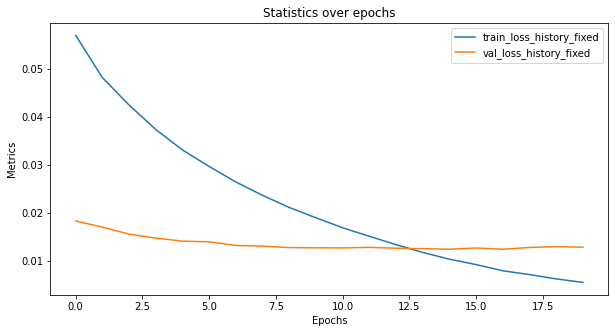

In [12]:
plot_train_graph(train_loss_history_fixed=train_loss_history_fixed, val_loss_history_fixed=val_loss_history_fixed)